# Necessary Imports

In [87]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

# Reading CSV file
Here we have assigned all of the csv into training

In [88]:
# train.csv

train_df = pd.read_csv("final_dataset.csv")
print("Training header")
train_df.head()



Training header


,Product,Date,Sales
0,0,1/15/2023,1980.0
1,1,1/15/2023,1818.0
2,2,1/15/2023,1456.0
3,3,1/15/2023,693.0
4,4,1/15/2023,906.0


#Spliting into Testin data

In [89]:
test_df = train_df.tail(10)
# You can also reset the index of the test DataFrame if needed
test_df.reset_index(drop=True, inplace=True)
# Display the testing DataFrame
print("Testing header")
test_df.head()
# print(test_df)


Testing header


,Product,Date,Sales
0,4,4/23/2023,1266.0
1,5,4/23/2023,1277.0
2,6,4/23/2023,806.0
3,0,5/23/2023,819.0
4,1,5/23/2023,766.0


In [90]:
# Here we count the totla values bases on each date which is months in this case
train_df.Date.value_counts()


1/15/2023    7
5/20/2023    7
3/21/2023    7
2/21/2023    7
1/21/2023    7
            ..
8/17/2023    7
7/17/2023    7
6/17/2023    7
5/17/2023    7
5/23/2023    7
Name: Date, Length: 101, dtype: int64

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  707 non-null    int64  
 1   Date     707 non-null    object 
 2   Sales    707 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 16.7+ KB


In [92]:
train_df.isnull().sum().sum() # we get the sum of all null values

0

In [93]:
#Since our dataset is very small therefor we have allocated last 10 values for testing
test_df.Date.value_counts()

5/23/2023    7
4/23/2023    3
Name: Date, dtype: int64

In [94]:
test_df.isnull().sum().sum()

0

# extract d,m,y for time series forecasting(Train)

In [95]:
#For train data

import datetime as dt
train_df['Date'] = pd.to_datetime(train_df['Date'])

train_df['year'] = train_df['Date'].dt.year
train_df['month'] = train_df['Date'].dt.month
train_df['day'] = train_df['Date'].dt.dayofweek

train_df.drop('Date', axis=1, inplace=True)
train_df.head()

,Product,Sales,year,month,day
0,0,1980.0,2023,1,6
1,1,1818.0,2023,1,6
2,2,1456.0,2023,1,6
3,3,693.0,2023,1,6
4,4,906.0,2023,1,6


In [96]:
train_df.year.value_counts() # train_df.month.value_counts()

2023    707
Name: year, dtype: int64

In [97]:
train_df.month.value_counts()

1     63
2     63
3     63
4     63
5     63
6     56
7     56
8     56
9     56
10    56
11    56
12    56
Name: month, dtype: int64

In [98]:
train_df.day.value_counts().sort_index()

0     98
1     98
2    105
3    105
4     98
5     98
6    105
Name: day, dtype: int64

In [99]:
train_df.Product.value_counts().sort_index()

0    101
1    101
2    101
3    101
4    101
5    101
6    101
Name: Product, dtype: int64

extract d,m,y for time series forecasting(Train)

In [100]:

import datetime as dt
test_df['Date'] = pd.to_datetime(test_df['Date'])

test_df['year'] = test_df['Date'].dt.year
test_df['month'] = test_df['Date'].dt.month
test_df['day'] = test_df['Date'].dt.dayofweek
test_df.drop('Date', axis=1, inplace=True)
test_df.head()

<ipython-input-100-a1f2809f8cc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Date'] = pd.to_datetime(test_df['Date'])
<ipython-input-100-a1f2809f8cc0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['year'] = test_df['Date'].dt.year
<ipython-input-100-a1f2809f8cc0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,Product,Sales,year,month,day
0,4,1266.0,2023,4,6
1,5,1277.0,2023,4,6
2,6,806.0,2023,4,6
3,0,819.0,2023,5,1
4,1,766.0,2023,5,1


In [101]:
test_df.month.value_counts()

5    7
4    3
Name: month, dtype: int64

In [102]:
test_df.month.value_counts().sort_index()

4    3
5    7
Name: month, dtype: int64

In [103]:
sales = train_df.pop('Sales') # extract sales col for target class
sales.head()

0    1980.0
1    1818.0
2    1456.0
3     693.0
4     906.0
Name: Sales, dtype: float64

In [105]:
# !pip install catboost

# Applying RandomForestRegressor and training model

In [110]:
# Applying Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=1)
model.fit(train_df, sales)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=1)

**Model Evaluation**

In [119]:
y_pred = model.predict(train_df.values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [120]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(sales, y_pred)
print(mse)

89844.2784552908


In [121]:
import numpy as np
rmse = np.sqrt(mse)
print(rmse)

299.74035173011123


In [122]:
from sklearn.metrics import r2_score
r2 = r2_score(sales, y_pred)
print(r2)


0.8776875157537606


In [123]:
importances = model.feature_importances_
print(importances)


[0.70794856 0.         0.16493246 0.12711898]


In [124]:
residuals = sales - y_pred
print(residuals)
# Plot residuals


0        7.526500
1     -484.156089
2      -25.167083
3     -593.905667
4     -521.383716
          ...    
702   -460.797946
703    236.951464
704    458.150221
705    134.958032
706   -196.973885
Name: Sales, Length: 707, dtype: float64


In [125]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_df, sales, cv=5, scoring='neg_mean_squared_error')
print(scores)

[-592477.17339856 -273624.06749294 -183350.83748193 -283462.7764969
 -578209.40447377]


In [126]:
y_pred = model.predict(train_df.values)
# print(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [127]:
# init sample_submission.csv
sample_df = pd.read_csv("final_dataset.csv")
sample_df['Sales'] = y_pred
sample_df.head()

,Product,Date,Sales
0,0,1/15/2023,1972.473500
1,1,1/15/2023,2302.156089
2,2,1/15/2023,1481.167083
3,3,1/15/2023,1286.905667
4,4,1/15/2023,1427.383716


In [128]:
sample_df.to_csv("submission_catboost.csv", index=False)

In [129]:
y_pred

array([1972.4735    , 2302.15608929, 1481.16708333, 1286.90566667,
       1427.38371591,  856.94544048,  611.99108333, 2171.55941667,
       2248.73889881, 1969.95692659,  934.860875  , 1409.33193056,
        826.09474405,  620.87588095, 2941.33788402, 3151.42590675,
       2502.34905754, 1526.10452381, 1314.43687987, 1144.45077976,
        769.56508333, 2672.99545833, 3341.16628571, 1939.19411905,
       1680.14832026, 1365.68553311, 1028.82247222,  635.98391071,
       2961.44360768, 2528.59396825, 2784.57458333, 1672.33236905,
       1793.54042208, 1098.31709722,  659.46478968, 3270.80276587,
       2972.55998413, 2359.62031151, 1451.36977438, 1282.95047436,
        861.32389474,  508.38033802, 1979.88212615, 1877.15074718,
       1661.14009997, 1048.58403295, 1205.79728233,  832.25838979,
        522.21407991, 2352.48888246, 2340.30698636, 1674.80525   ,
       1099.5150496 , 1451.07294553,  813.30521304,  598.42863218,
       1629.26327484, 1771.95405622, 1664.64553639, 1063.47200

In [130]:
y_pred.shape

(707,)

In [131]:
sales.shape

(707,)

In [132]:
product_classes = train_df['Product'].unique()


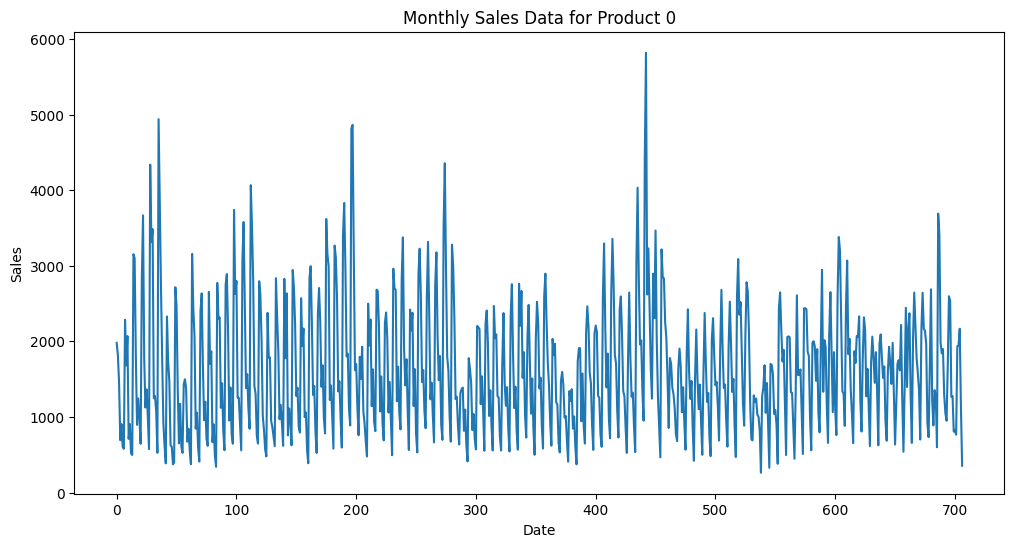

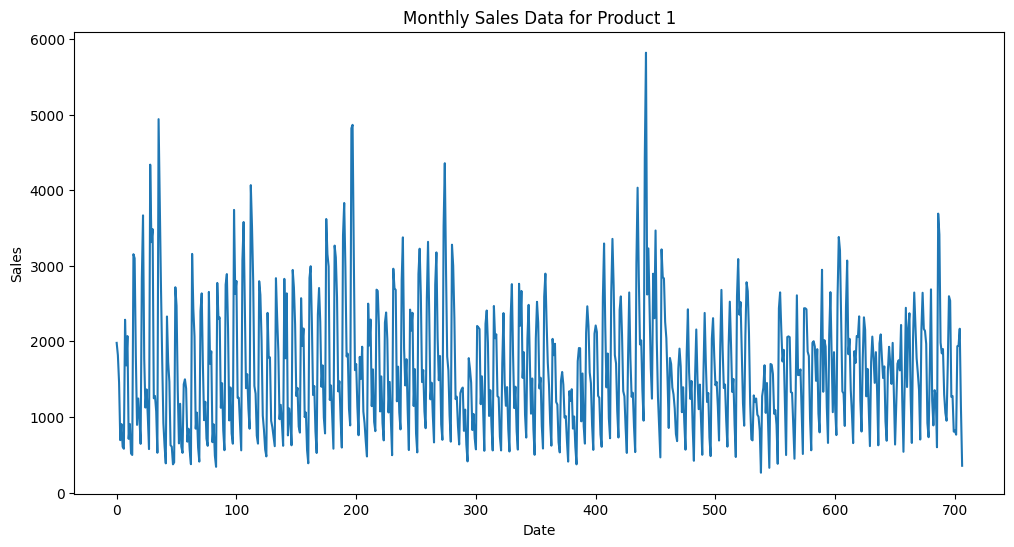

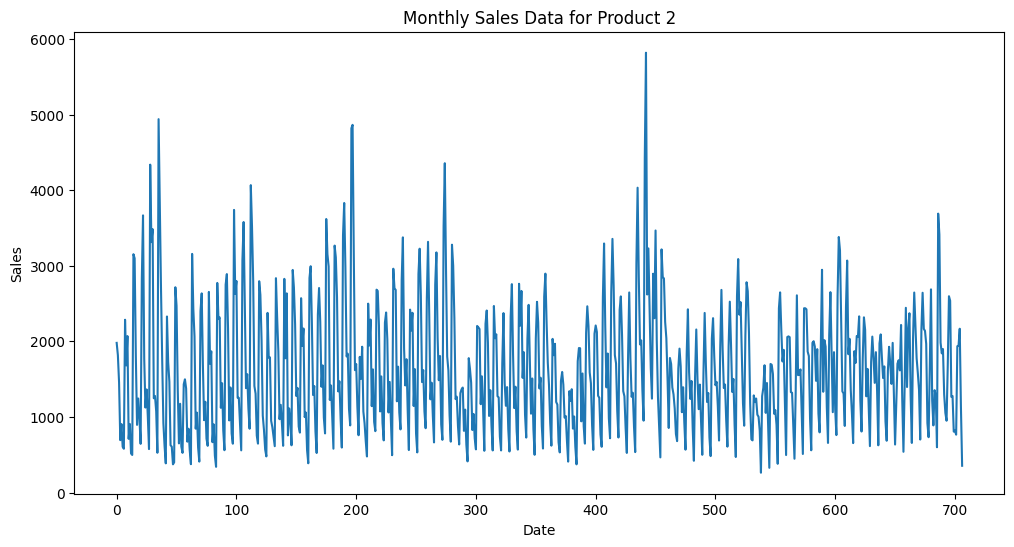

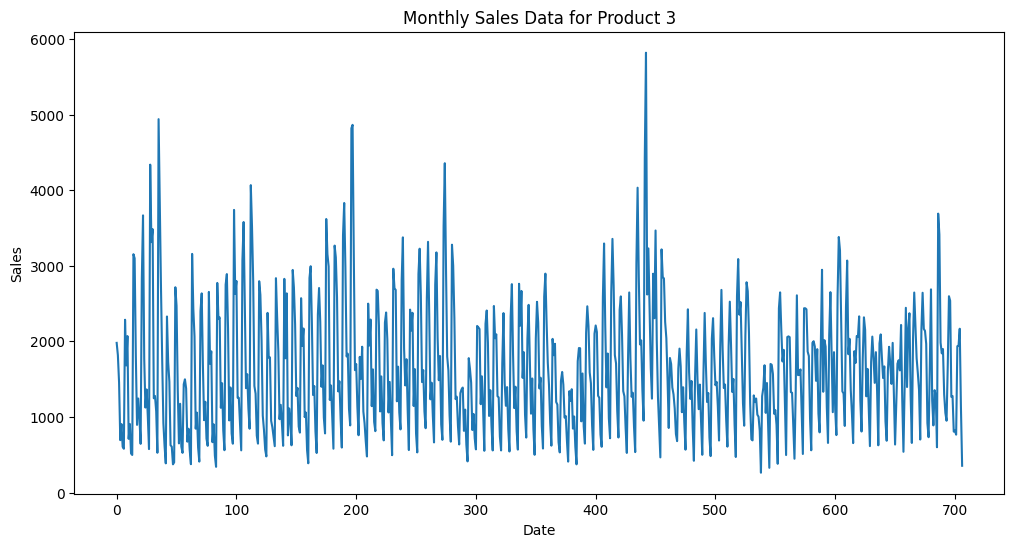

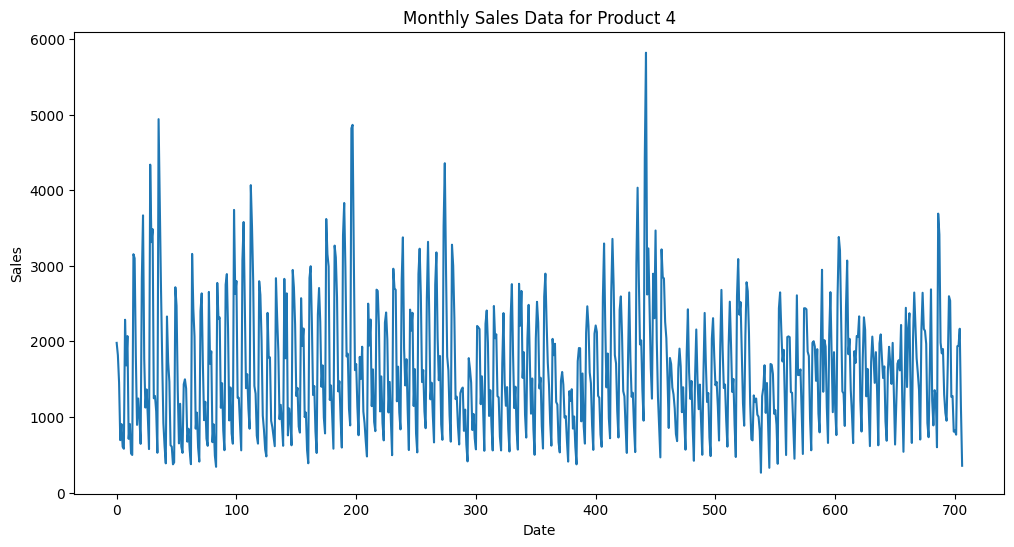

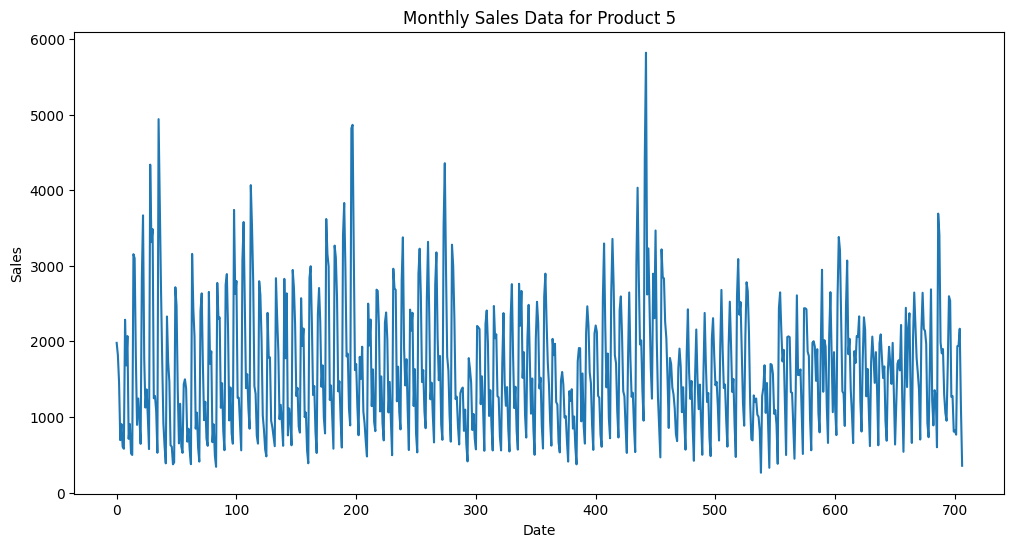

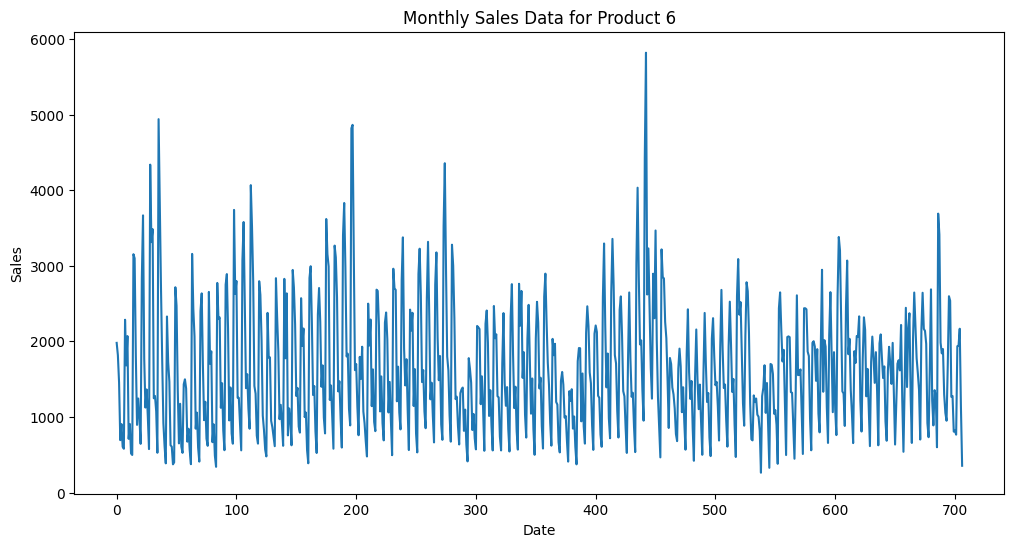

In [133]:
import matplotlib.pyplot as plt

# Iterate through each product class and train a separate model
for product_class in product_classes:
    # Filter data for the current product class
    product_data = train_df[train_df['Product'] == product_class]

    # Sort the data by date
    product_data = product_data.sort_values(by='month')

    # Create a time series with 'Date' as the index
    ts = product_data.set_index('month')

    # Visualize the sales data
    plt.figure(figsize=(12, 6))
    plt.plot(sales)
    plt.title(f'Monthly Sales Data for Product {product_class}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()



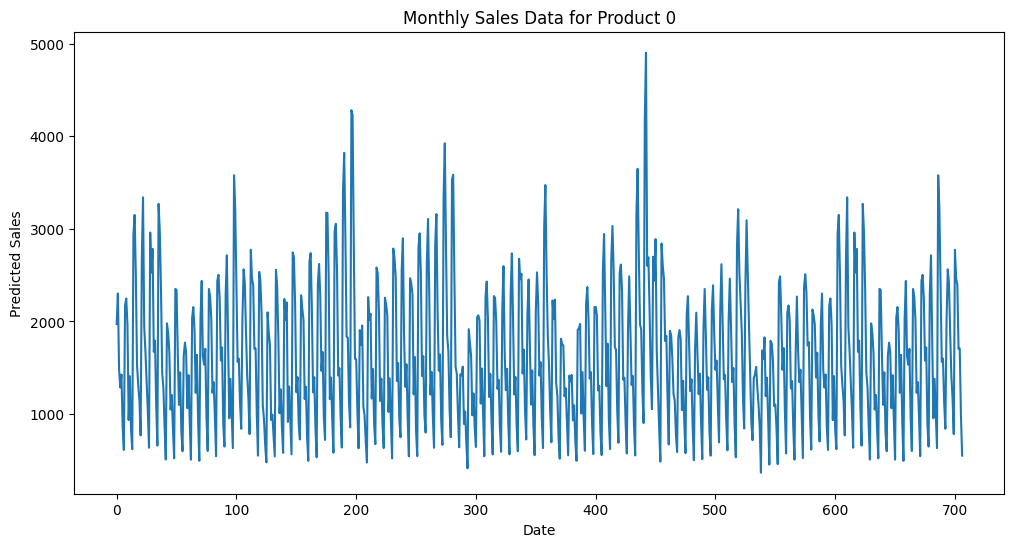

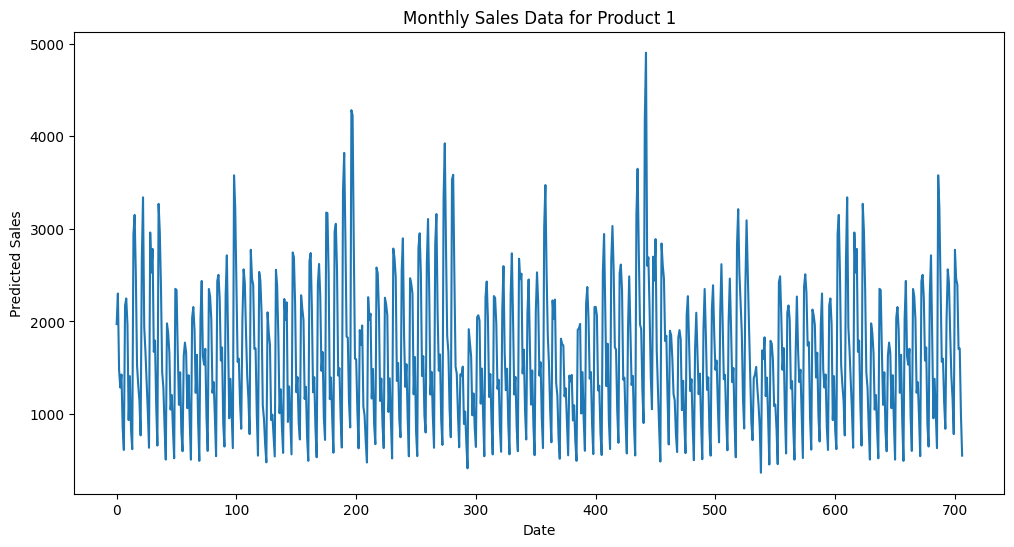

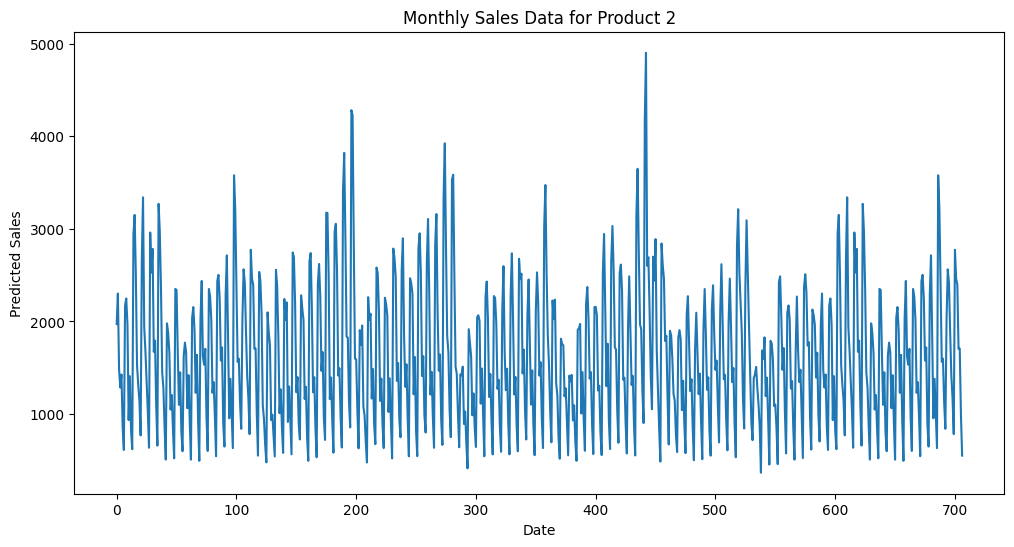

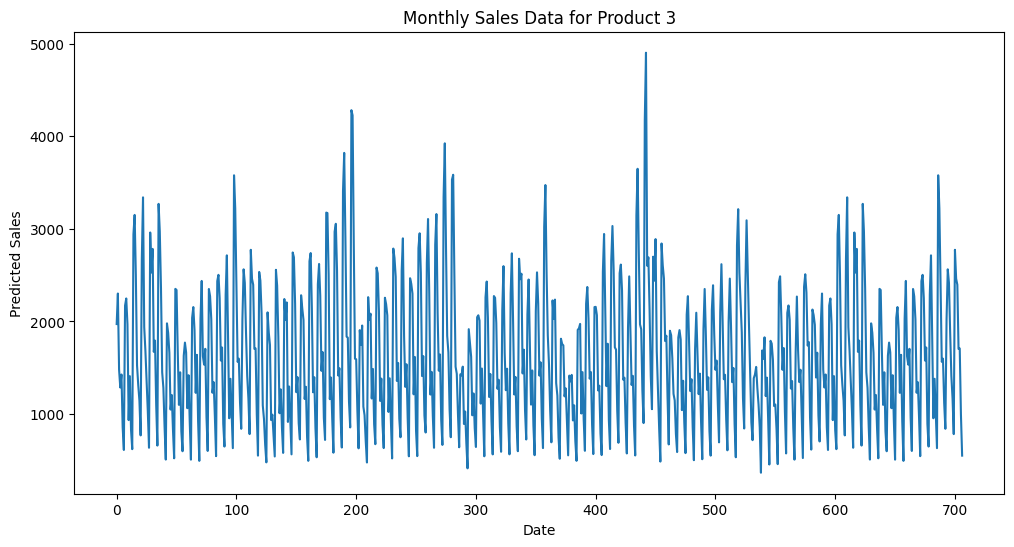

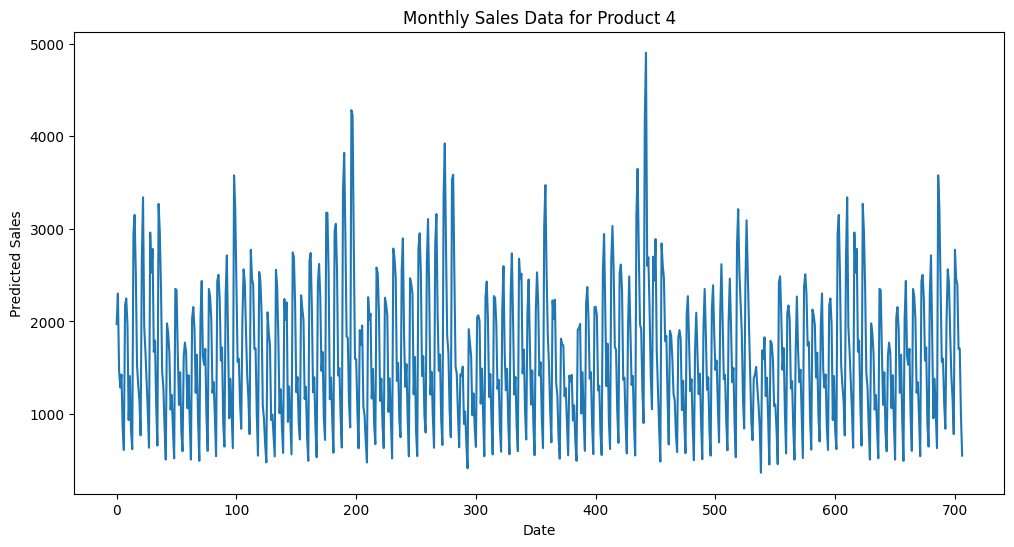

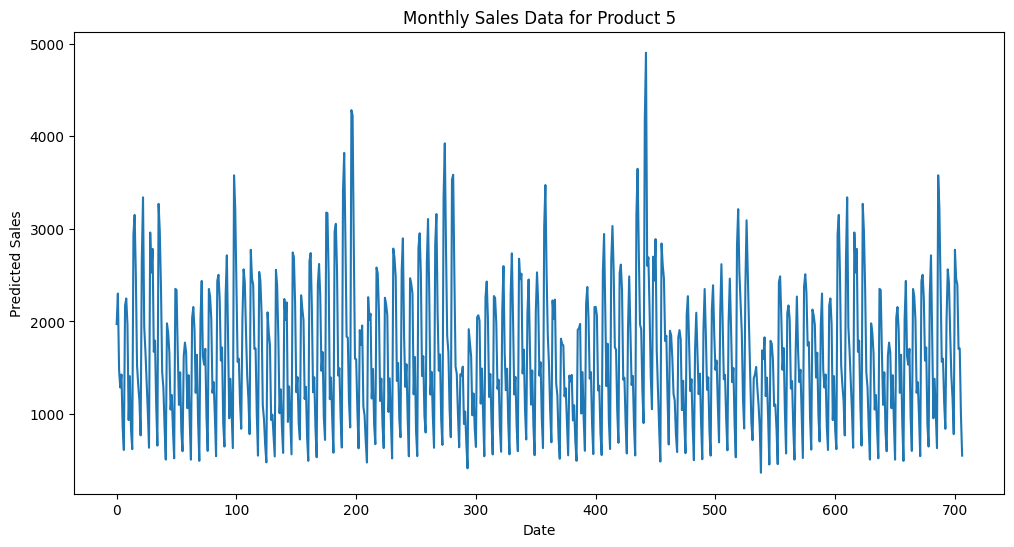

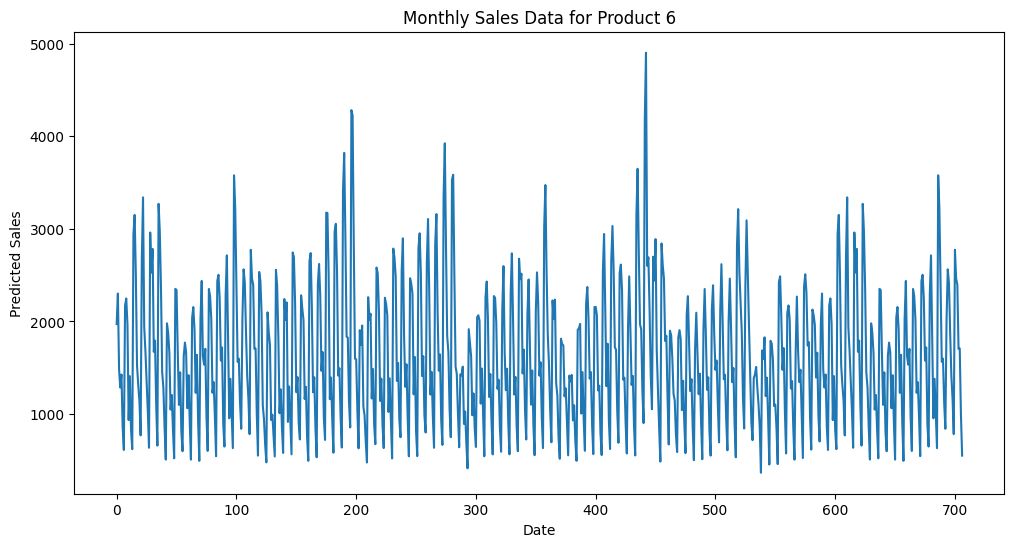

In [134]:
import matplotlib.pyplot as plt

# Iterate through each product class and train a separate model
for product_class in product_classes:
    # Filter data for the current product class
    product_data = train_df[train_df['Product'] == product_class]

    # Sort the data by date
    product_data = product_data.sort_values(by='month')

    # Create a time series with 'Date' as the index
    ts = product_data.set_index('month')

    # Visualize the sales data
    plt.figure(figsize=(12, 6))
    plt.plot(y_pred)
    plt.title(f'Monthly Sales Data for Product {product_class}')
    plt.xlabel('Date')
    plt.ylabel('Predicted Sales')
    plt.show()



In [135]:
# y_pred = model.predict(train_df.values)
train_df.values

array([[   0, 2023,    1,    6],
       [   1, 2023,    1,    6],
       [   2, 2023,    1,    6],
       ...,
       [   4, 2023,    5,    1],
       [   5, 2023,    5,    1],
       [   6, 2023,    5,    1]])

In [136]:
y_pred = model.predict([[1,2015,2, 10]])
print(y_pred)

[2453.77975]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
